In [4]:
import pandas as pd

full_train = pd.read_csv('/mnt/ml-team/minerva/toxic/data/train.csv')
train = pd.read_csv('/mnt/ml-team/minerva/toxic/data/train_split.csv')
valid = pd.read_csv('/mnt/ml-team/minerva/toxic/data/valid_split.csv')
test = pd.read_csv('/mnt/ml-team/minerva/toxic/data/test.csv')

In [7]:
train.shape, valid.shape, test.shape

((76680, 8), (19171, 8), (226998, 2))

In [8]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,862934109910,Ontario maps \n\nI notice you're the creator o...,0,0,0,0,0,0
1,983238003236,"""==Speedy deletion==\n\nHey, I just finished w...",0,0,0,0,0,0


In [9]:
train['chars'] = train['comment_text'].astype(str).apply(len)
test['chars'] = test['comment_text'].astype(str).apply(len)

In [10]:
train['chars'].describe()

count    76680.000000
mean       396.171022
std        599.407479
min          6.000000
25%         96.000000
50%        205.000000
75%        434.000000
max       5000.000000
Name: chars, dtype: float64

In [11]:
test['chars'].describe()

count    2.269980e+05
mean     4.737803e+02
std      4.445600e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.180000e+02
75%      5.290000e+02
max      2.003165e+06
Name: chars, dtype: float64

In [12]:
train_comments = list(train['comment_text'].values)
train_comments = ' '.join(train_comments)
print(len(set(train_comments)))

1862


In [20]:
from collections import Counter

train_comments = list(train['comment_text'].values)
train_comments = ' '.join(train_comments)
counted_chars = Counter(train_comments)

Counter({' ': 5222601, 'e': 2723702, 't': 2069644, 'a': 1823118, 'o': 1802343, 'i': 1706162, 'n': 1534564, 's': 1423815, 'r': 1287660, 'h': 1010098, 'l': 931049, 'd': 826586, 'u': 710939, 'c': 668764, 'm': 519679, 'y': 483678, 'p': 465992, 'g': 450645, 'f': 420057, 'w': 364350, 'b': 334534, '.': 329696, 'k': 245452, 'v': 231640, ',': 229476, 'I': 196643, '\n': 195346, '"': 188221, 'T': 114737, "'": 105443, 'A': 103078, 'S': 83419, 'W': 71456, 'C': 67500, '!': 60764, 'E': 60655, 'P': 58485, 'N': 54724, 'O': 54575, 'H': 53877, '1': 52657, 'R': 50171, '-': 49445, '0': 48572, ':': 46058, 'M': 45894, 'x': 44336, 'B': 43838, ')': 43710, 'D': 42629, '(': 41182, 'U': 40367, 'F': 39844, '2': 39578, 'L': 36570, 'G': 36031, '?': 35090, 'j': 34766, 'Y': 34008, '/': 28960, 'z': 24686, 'K': 24498, 'q': 22528, '9': 18950, '3': 18692, 'J': 17860, '5': 17061, '4': 16761, '8': 15156, '7': 14496, '6': 14111, 'V': 14082, '=': 14047, ';': 10422, '_': 10084, '|': 7418, ']': 4370, '[': 4068, '~': 3813, '&': 

In [30]:
counted_chars.most_common()[:100]

[(' ', 5222601),
 ('e', 2723702),
 ('t', 2069644),
 ('a', 1823118),
 ('o', 1802343),
 ('i', 1706162),
 ('n', 1534564),
 ('s', 1423815),
 ('r', 1287660),
 ('h', 1010098),
 ('l', 931049),
 ('d', 826586),
 ('u', 710939),
 ('c', 668764),
 ('m', 519679),
 ('y', 483678),
 ('p', 465992),
 ('g', 450645),
 ('f', 420057),
 ('w', 364350),
 ('b', 334534),
 ('.', 329696),
 ('k', 245452),
 ('v', 231640),
 (',', 229476),
 ('I', 196643),
 ('\n', 195346),
 ('"', 188221),
 ('T', 114737),
 ("'", 105443),
 ('A', 103078),
 ('S', 83419),
 ('W', 71456),
 ('C', 67500),
 ('!', 60764),
 ('E', 60655),
 ('P', 58485),
 ('N', 54724),
 ('O', 54575),
 ('H', 53877),
 ('1', 52657),
 ('R', 50171),
 ('-', 49445),
 ('0', 48572),
 (':', 46058),
 ('M', 45894),
 ('x', 44336),
 ('B', 43838),
 (')', 43710),
 ('D', 42629),
 ('(', 41182),
 ('U', 40367),
 ('F', 39844),
 ('2', 39578),
 ('L', 36570),
 ('G', 36031),
 ('?', 35090),
 ('j', 34766),
 ('Y', 34008),
 ('/', 28960),
 ('z', 24686),
 ('K', 24498),
 ('q', 22528),
 ('9', 18950)

In [7]:
test_comments = list(test['comment_text'].astype(str).values)
test_comments = ' '.join(test_comments)
print(len(set(test_comments)))

3652


In [9]:
def count_words(x):
    return len(x.split())

train['words'] = train['comment_text'].astype(str).apply(count_words)
test['words'] = test['comment_text'].astype(str).apply(count_words)

In [10]:
train['words'].describe()

count    95851.000000
mean        67.423605
std         99.806779
min          1.000000
25%         17.000000
50%         36.000000
75%         75.000000
max       1403.000000
Name: words, dtype: float64

In [11]:
test['words'].describe()

count    226998.000000
mean         73.763963
std         235.546519
min           1.000000
25%          10.000000
50%          35.000000
75%          84.000000
max       58515.000000
Name: words, dtype: float64

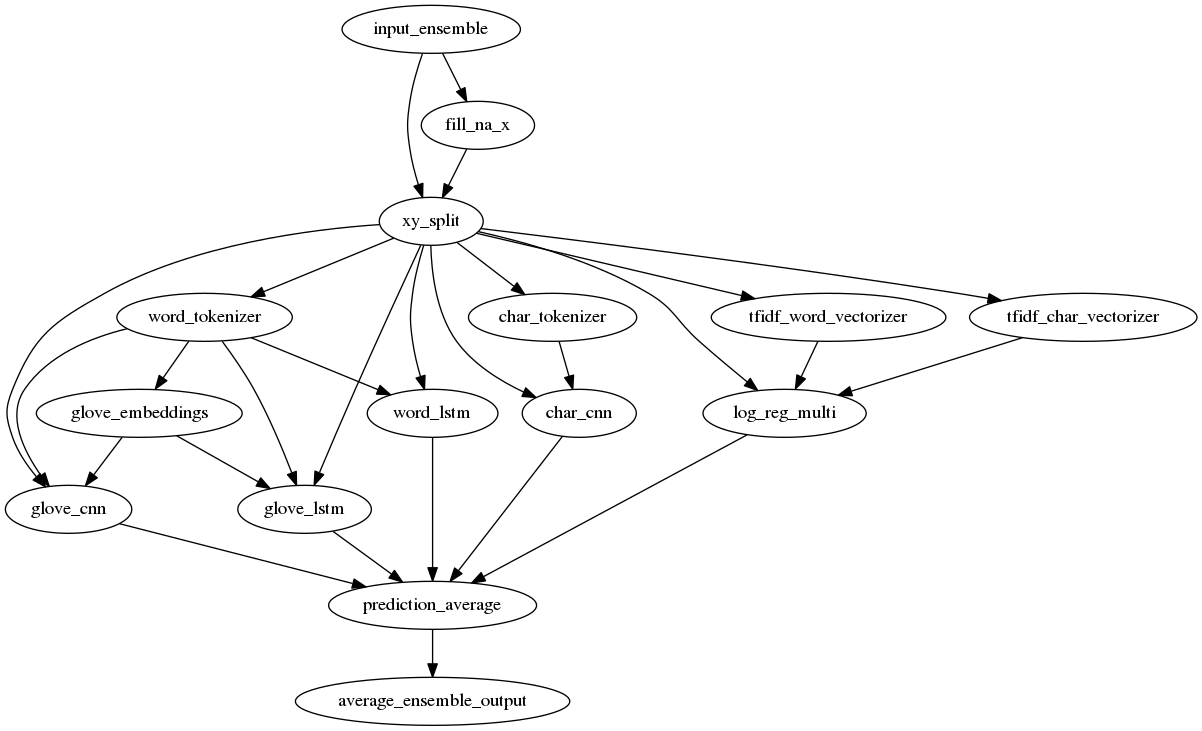

In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from pipeline_config import SOLUTION_CONFIG
from pipelines import ensemble_train_pipeline

pipe = ensemble_train_pipeline(SOLUTION_CONFIG)
pipe